<h1>K-Nearest Neighbour (KNN) Classifier<h1>
   

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from math import sqrt
%matplotlib inline

plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 8,6
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
# First, let's load the CSV files to inspect the data and understand their structure.

import pandas as pd

# Load the datasets

# Load the data (assuming train_df, test_df, val_df have been loaded)
x_train = pd.read_csv('Dataset-3/train_data.csv')
y_train = pd.read_csv('Dataset-3/train_label.csv')
x_test = pd.read_csv('Dataset-3/test_data.csv')
y_test = pd.read_csv('Dataset-3/test_label.csv')
x_val = pd.read_csv('Dataset-3/val_data.csv')
y_val = pd.read_csv('Dataset-3/val_label.csv')

x_train = x_train.values
y_train = y_train.values.flatten()
x_test = x_test.values
y_test = y_test.values.flatten()
x_val = x_val.values
y_val = y_val.values.flatten()

In [3]:
from math import sqrt
# Function to compute Euclidean distance
def euclidean(a, b):
    return sqrt(np.sum((np.array(a) - np.array(b)) ** 2))

# KNN function to classify test point
def knn(x, y, test, k):
    distances = []
    for i in range(len(x)):
        d = euclidean(x[i], test)
        distances.append((d, y[i]))

    distances.sort(key=lambda x: x[0])  # Sort by distance
    count = Counter()

    for i in distances[:k]:
        count[i[1]] += 1

    # Handle tie-breaking
    max_count = count.most_common(1)[0][1]
    tied_classes = [key for key, value in count.items() if value == max_count]

    pred = tied_classes[0]

    # Handle tie by using average distance
    if len(tied_classes) > 1:
        class_avg_dist = {}
        for cls in tied_classes:
            cls_distances = [d[0] for d in distances[:k] if d[1] == cls]
            class_avg_dist[cls] = np.mean(cls_distances)
        pred = min(class_avg_dist, key=class_avg_dist.get)
    else:
        pred = tied_classes[0]

    return pred

# Function to predict using KNN for a dataset
def knn_predict(x_train, y_train, x_test, k):
    predictions = []
    for test_point in x_test:
        pred = knn(x_train, y_train, test_point, k)
        predictions.append(pred)
    return predictions

# Function to evaluate the accuracy of predictions
def evaluate_accuracy(y_true, y_pred):
    correct = np.sum(np.array(y_true) == np.array(y_pred))
    return correct / len(y_true)





In [4]:
# Function to plot confusion matrix with customized font sizes
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))

    # Set title and labels with specific font sizes
    plt.title(title, fontsize=12)
    plt.xlabel('Predicted Label', fontsize=10)
    plt.ylabel('True Label', fontsize=10)

    # Optionally adjust tick label sizes
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()


In [5]:
#Hyperparameter

# Choose k values
k_values = [1, 9, 15]

In [6]:
# Lists to store accuracies for different k values
Accuracyknn_train = []
Accuracyknn_val = []
Accuracyknn_test = []

# Evaluate KNN for each k value
for k in k_values:
    # Predict on training data
    train_predictions = knn_predict(x_train, y_train, x_train, k)
    train_accuracy = evaluate_accuracy(y_train, train_predictions)
    Accuracyknn_train.append(train_accuracy)

    # Predict on validation (CV) data
    val_predictions = knn_predict(x_train, y_train, x_val, k)
    val_accuracy = evaluate_accuracy(y_val, val_predictions)
    Accuracyknn_val.append(val_accuracy)

    # Predict on test data
    test_predictions = knn_predict(x_train, y_train, x_test, k)
    test_accuracy = evaluate_accuracy(y_test, test_predictions)
    Accuracyknn_test.append(test_accuracy)

# Create a DataFrame to store the accuracies for different k values
accuracy_table_KNN = pd.DataFrame(
    {
        "k-value": k_values,
        "Accuracy train": Accuracyknn_train,
        "Accuracy Val": Accuracyknn_val,
        "Accuracy test": Accuracyknn_test,
    }
)

print(accuracy_table_KNN)


   k-value  Accuracy train  Accuracy Val  Accuracy test
0        1        1.000000      0.387960       0.405676
1        9        0.669366      0.418060       0.490818
2       15        0.622201      0.421405       0.514190



Results for K=1:
Test Accuracy for K=1: 0.4056761268781302
Validation Accuracy for K=1: 0.3879598662207358
Train Accuracy for K=1: 1.0


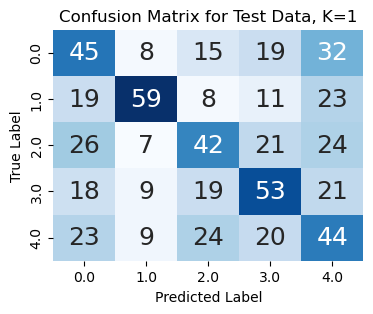

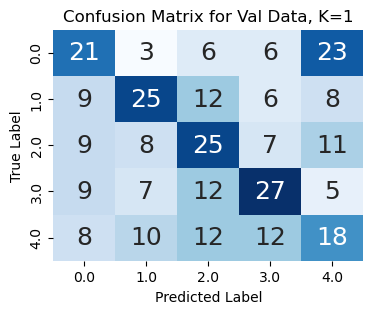

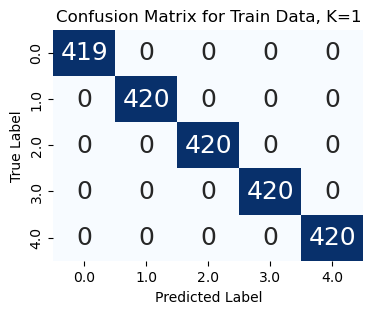


Results for K=9:
Test Accuracy for K=9: 0.49081803005008345
Validation Accuracy for K=9: 0.4180602006688963
Train Accuracy for K=9: 0.6693663649356837


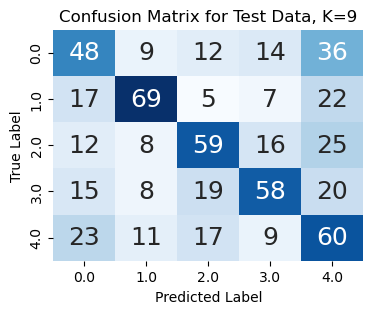

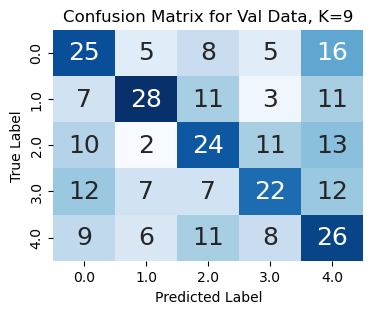

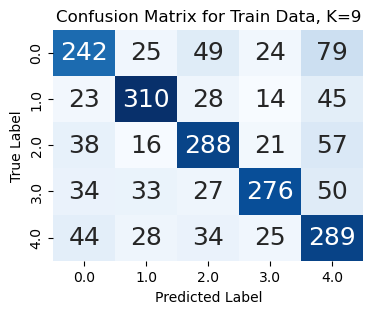


Results for K=15:
Test Accuracy for K=15: 0.5141903171953256
Validation Accuracy for K=15: 0.4214046822742475
Train Accuracy for K=15: 0.6222010481181515


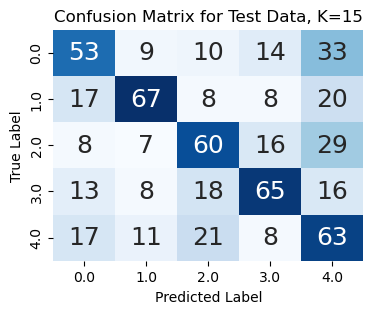

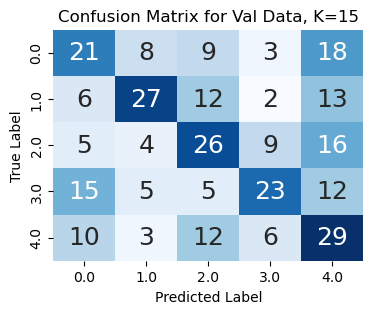

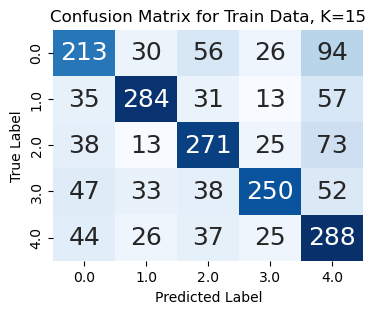

In [7]:
# Run KNN for each k value on test and validation data
for k in k_values:
    print(f"\nResults for K={k}:")

    # Predict on test data
    test_predictions = knn_predict(x_train, y_train, x_test, k)
    test_accuracy = evaluate_accuracy(y_test, test_predictions)
    print(f"Test Accuracy for K={k}: {test_accuracy}")

    # Predict on validation data
    val_predictions = knn_predict(x_train, y_train, x_val, k)
    val_accuracy = evaluate_accuracy(y_val, val_predictions)
    print(f"Validation Accuracy for K={k}: {val_accuracy}")

    # Predict on validation data
    train_predictions = knn_predict(x_train, y_train, x_train, k)
    train_accuracy = evaluate_accuracy(y_train, train_predictions)
    print(f"Train Accuracy for K={k}: {train_accuracy}")
    # Example of how to use the function
    plot_confusion_matrix(y_test, test_predictions, title=f"Confusion Matrix for Test Data, K={k}")
    plot_confusion_matrix(y_val, val_predictions, title=f"Confusion Matrix for Val Data, K={k}")
    plot_confusion_matrix(y_train, train_predictions, title=f"Confusion Matrix for Train Data, K={k}")
